In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("x_train.shape[0]:", x_train.shape[0])
print("x_train.shape[0]/32:", x_train.shape[0]/32)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
x_train.shape[0]: 50000
x_train.shape[0]/32: 1562.5
y_train.shape: (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [4]:
print(x_train[0])
print(x_train[0].shape)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [10]:
# Build the model using the functional API
# Input
i = Input(shape=x_train[0].shape) # 입력할 수있는 depth값

# Conv2D
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
# Conv2D
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
# Conv2D
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
# Flatten
x = Flatten()(x)
#Dropout
x = Dropout(0.25)(x)
# Dense(relu)
x = Dense(1024, activation='relu')(x)
#Dropout
x = Dropout(0.25)(x)
# Dense(softmax)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1180

In [12]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result = model.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 487us/sample - loss: 1.5013 - acc: 0.4540 - val_loss: 1.2820 - val_acc: 0.5416
Epoch 2/10
50000/50000 [==============================] - 24s 475us/sample - loss: 1.1673 - acc: 0.5854 - val_loss: 1.0292 - val_acc: 0.6334
Epoch 3/10
50000/50000 [==============================] - 24s 479us/sample - loss: 1.0204 - acc: 0.6372 - val_loss: 0.9888 - val_acc: 0.6579
Epoch 4/10
50000/50000 [==============================] - 24s 488us/sample - loss: 0.9010 - acc: 0.6812 - val_loss: 0.9293 - val_acc: 0.6719
Epoch 5/10
50000/50000 [==============================] - 25s 503us/sample - loss: 0.8077 - acc: 0.7140 - val_loss: 0.8940 - val_acc: 0.6902
Epoch 6/10
50000/50000 [==============================] - 24s 482us/sample - loss: 0.7222 - acc: 0.7445 - val_loss: 0.8675 - val_acc: 0.6984
Epoch 7/10
50000/50000 [==============================] - 25s 499us/sample - loss: 0.6498 - acc: 0.7708 

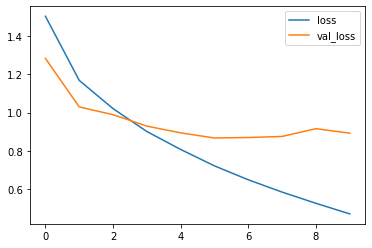

In [14]:
# Plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

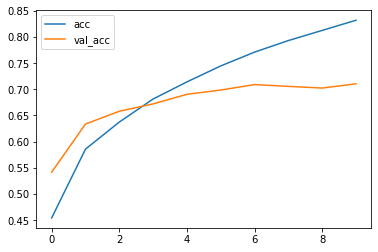

In [15]:
# Plot accuracy per iteration
# TF2버전의 경우 acc -> accuracy로 변경
plt.plot(result.history['acc'], label='acc')
plt.plot(result.history['val_acc'], label='val_acc')
plt.legend()

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Consusion matrix, without normalization
[[727  36  34  10  18   2  14  15  97  47]
 [ 15 828   1   6   2   2   8   2  25 111]
 [ 63  14 561  42 103  58  85  35  24  15]
 [ 22  16  69 410  69 182 114  66  28  24]
 [ 18   9  46  52 657  34  78  75  23   8]
 [ 14   9  45 122  52 604  57  66  21  10]
 [ 11   9  21  24  44  19 838  10  11  13]
 [ 15   7  23  16  57  43  16 797   5  21]
 [ 41  49   4   7   6   4   8   3 856  22]
 [ 31  65   9   5   3   4   9  14  35 825]]


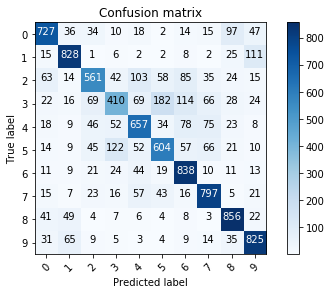

In [17]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [18]:
# Label mapping
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Text(0.5, 1.0, 'True label: bird, Predicted label: frog')

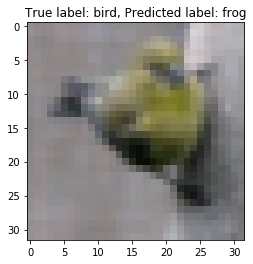

In [23]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
temp_idx = np.random.choice(misclassified_idx)
plt.imshow(x_test[temp_idx]) # 원래 쉐입과 동일해서 reshape해주지 않아도 됨
plt.title('True label: %s, Predicted label: %s' % (labels[y_test[temp_idx]], labels[p_test[temp_idx]]))